In [22]:
import nest_asyncio
import asyncio
from bs4 import BeautifulSoup
from pyppeteer import launch,launcher
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from datetime import datetime,timedelta,timezone
from requests.auth import HTTPBasicAuth
from time import sleep

import pandas as pd
import requests
import numpy as np
import asyncio
import logging
import tkinter
import joblib
import json
import pickle
import os

In [2]:
'''
與資料庫中NBA_BasicData資料內容相同
'''
df = pd.read_excel(r"C:/Users/user/NBA預測/20221217/predictdata2.xlsx",index_col='Matchtime')
df

,Home,HomeScore,Away,AwayScore,讓分,總分,Eventcode_x,主勝(初),客勝(初),主勝率(初),...,Away_starters5_BLK,Away_starters5_TOV,Away_starters5_PF,Away_starters5_PTS,Away_starters5_Game_Score,Away_starters5_+/-,Away_starters5_noplay_PointDiff,客隊ELO,主隊ELO,win
Matchtime,,,,,,,,,,,,,,,,,,,,,
2014-11-08,BOS,101,IND,98,5.5,191.0,188660,1.53,2.45,61.56,...,0.5,0.0,0.8,1.9,4.3,3.70,-8.2,2257.9675,1970.8143,1
2014-11-08,PHO,112,SAC,114,5.0,208.5,188656,1.50,2.51,62.63,...,1.3,0.2,1.3,1.8,15.4,10.45,-3.9,1918.5838,2154.6768,0
2014-11-08,UTA,82,DAL,105,-2.5,205.5,188655,2.17,1.65,43.24,...,0.4,0.1,1.4,1.8,4.5,2.69,6.6,2220.9141,1920.5684,0
2014-11-09,IND,90,WAS,97,-3.5,183.5,188666,2.33,1.59,40.60,...,0.0,0.3,1.0,1.1,3.9,3.29,3.8,2094.4555,2254.1106,0
2014-11-09,MIA,102,MIN,92,7.5,205.0,188667,1.32,3.35,71.53,...,0.6,0.5,2.3,2.1,27.5,20.63,0.8,2080.6630,2355.2815,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-27,CHI,124,IND,109,7.5,232.5,484626,1.30,3.46,72.59,...,0.9,0.3,0.6,4.0,13.5,11.03,6.9,1942.8995,2193.6864,1
2022-10-27,MIN,134,SAS,122,9.5,235.5,484627,1.25,3.90,75.65,...,0.8,0.7,2.2,3.1,11.6,9.00,-7.0,2113.3237,2066.1966,1
2022-10-27,UTA,109,HOU,101,8.5,232.5,484628,1.44,2.79,65.93,...,1.0,0.1,1.2,3.9,9.0,6.84,-10.3,1794.1439,2285.1027,1


In [3]:
home_col = []
for c in df.columns.values:
    if ('Minutes' in c) & ('Home' in c):
        home_col.append(c)
home_col

['Home_starters1_Minutes',
 'Home_starters2_Minutes',
 'Home_starters3_Minutes',
 'Home_starters4_Minutes',
 'Home_starters5_Minutes']

In [4]:
df.columns.values

array(['Home', 'HomeScore', 'Away', 'AwayScore', '讓分', '總分',
       'Eventcode_x', '主勝(初)', '客勝(初)', '主勝率(初)', '客勝率(初)', '凱利指數(初)',
       '凱利指數(終)', '主勝(終)', '客勝(終)', '主勝率(終)', '客勝率(終)', 'Away_game',
       'Away_win', 'Away_lose', 'Away_win_score', 'Away_lose_score',
       'Away_net_score', 'Away_rank', 'Away_win_rate', 'Away_game_inhome',
       'Away_win_inhome', 'Away_lose_inhome', 'Away_win_score_inhome',
       'Away_lose_score_inhome', 'Away_net_score_inhome',
       'Away_rank_inhome', 'Away_win_rate_inhome', 'Away_game_inaway',
       'Away_win_inaway', 'Away_lose_inaway', 'Away_win_score_inaway',
       'Away_lose_score_inaway', 'Away_net_score_inaway',
       'Away_rank_inaway', 'Away_win_rate_inaway', 'Away_game_insix',
       'Away_win_insix', 'Away_lose_insix', 'Away_win_score_insix',
       'Away_lose_score_insix', 'Away_net_score_insix',
       'Away_win_rate_insix', 'Home_game', 'Home_win', 'Home_lose',
       'Home_win_score', 'Home_lose_score', 'Home_net_score', 'H

In [5]:
home_starter_col = []
for c in df.columns.values:
    if ('starters1' in c) & ('Home' in c):
        home_starter_col.append(c)
home_starter_col

['Home_starters1_PointDiff',
 'Home_starters1_Game_Start',
 'Home_starters1_Minutes',
 'Home_starters1_FG',
 'Home_starters1_FGA',
 'Home_starters1_FG_P',
 'Home_starters1_P3',
 'Home_starters1_P3A',
 'Home_starters1_P3_P',
 'Home_starters1_FT',
 'Home_starters1_FTA',
 'Home_starters1_FT_P',
 'Home_starters1_ORB',
 'Home_starters1_TRB',
 'Home_starters1_AST',
 'Home_starters1_STL',
 'Home_starters1_BLK',
 'Home_starters1_TOV',
 'Home_starters1_PF',
 'Home_starters1_PTS',
 'Home_starters1_Game_Score',
 'Home_starters1_+/-',
 'Home_starters1_noplay_PointDiff']

In [6]:
away_col = []
for c in df.columns.values:
    if ('Minutes' in c) & ('Away' in c):
        away_col.append(c)
away_col

['Away_starters1_Minutes',
 'Away_starters2_Minutes',
 'Away_starters3_Minutes',
 'Away_starters4_Minutes',
 'Away_starters5_Minutes']

In [7]:
away_starter_col = []
for c in df.columns.values:
    if ('starters' in c) & ('Away' in c):
        away_starter_col.append(c)
away_starter_col

['Away_starters1_PointDiff',
 'Away_starters1_Game_Start',
 'Away_starters1_Minutes',
 'Away_starters1_FG',
 'Away_starters1_FGA',
 'Away_starters1_FG_P',
 'Away_starters1_P3',
 'Away_starters1_P3A',
 'Away_starters1_P3_P',
 'Away_starters1_FT',
 'Away_starters1_FTA',
 'Away_starters1_FT_P',
 'Away_starters1_ORB',
 'Away_starters1_TRB',
 'Away_starters1_AST',
 'Away_starters1_STL',
 'Away_starters1_BLK',
 'Away_starters1_TOV',
 'Away_starters1_PF',
 'Away_starters1_PTS',
 'Away_starters1_Game_Score',
 'Away_starters1_+/-',
 'Away_starters1_noplay_PointDiff',
 'Away_starters2_PointDiff',
 'Away_starters2_Game_Start',
 'Away_starters2_Minutes',
 'Away_starters2_FG',
 'Away_starters2_FGA',
 'Away_starters2_FG_P',
 'Away_starters2_P3',
 'Away_starters2_P3A',
 'Away_starters2_P3_P',
 'Away_starters2_FT',
 'Away_starters2_FTA',
 'Away_starters2_FT_P',
 'Away_starters2_ORB',
 'Away_starters2_TRB',
 'Away_starters2_AST',
 'Away_starters2_STL',
 'Away_starters2_BLK',
 'Away_starters2_TOV',
 'Aw

In [8]:
starts_m = df[home_col]
a = starts_m.iloc[0].sort_values(ascending=False)
a

Home_starters5_Minutes    34.92
Home_starters2_Minutes    34.60
Home_starters3_Minutes    33.25
Home_starters1_Minutes    32.49
Home_starters4_Minutes    26.98
Name: 2014-11-08 00:00:00, dtype: float64

# 修改先發投手位置

In [9]:
#主隊
df_starts_all = pd.DataFrame()
starts_m = df[home_col]
for i in range(len(starts_m)):
    df_starters_one = pd.DataFrame()
    df_starters_new = starts_m.iloc[i].sort_values(ascending=False)
    count = 1
    for s in df_starters_new.index:
        starter_number = s.replace("_Minutes","")
        home_starter_col = []
        for c in df.columns.values:
            if (starter_number in c):
                home_starter_col.append(c)
        starter_number = starter_number.replace("Home_starters","")
        starts_df  = df[home_starter_col].iloc[i:i+1]     
        starts_df.columns = starts_df.columns.str.replace(f's{starter_number}_',f's{str(count)}_')
        df_starters_one = pd.concat([df_starters_one,starts_df],axis=1)
        count += 1
    df_starts_all = df_starts_all.append(df_starters_one)

In [10]:
df_starts_all

,Home_starters1_PointDiff,Home_starters1_Game_Start,Home_starters1_Minutes,Home_starters1_FG,Home_starters1_FGA,Home_starters1_FG_P,Home_starters1_P3,Home_starters1_P3A,Home_starters1_P3_P,Home_starters1_FT,...,Home_starters5_TRB,Home_starters5_AST,Home_starters5_STL,Home_starters5_BLK,Home_starters5_TOV,Home_starters5_PF,Home_starters5_PTS,Home_starters5_Game_Score,Home_starters5_+/-,Home_starters5_noplay_PointDiff
Matchtime,,,,,,,,,,,,,,,,,,,,,
2014-11-08,-5.6,1.0,34.92,4.9,10.3,0.04,0.5,1.9,0.01,1.0,...,5.1,7.2,2.0,0.7,0.1,1.9,4.0,15.6,11.90,5.00
2014-11-08,-0.5,1.0,35.29,6.1,13.8,0.04,0.5,2.9,0.02,2.8,...,3.7,5.8,0.2,0.6,1.0,0.9,2.1,6.3,5.86,0.80
2014-11-08,-5.7,1.0,35.88,6.2,13.8,0.04,1.4,5.0,0.02,5.1,...,5.7,9.3,1.0,0.3,0.5,2.1,2.5,13.8,10.31,2.10
2014-11-09,-1.9,0.8,30.74,4.6,11.4,0.03,1.4,3.9,0.03,1.9,...,5.0,6.8,1.4,0.6,0.1,2.5,2.5,8.2,5.35,7.00
2014-11-09,1.4,1.0,34.91,6.7,14.5,0.04,1.1,3.6,0.03,4.6,...,1.6,1.8,3.3,1.0,0.0,1.3,1.8,6.3,5.01,-3.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-27,-6.6,1.0,35.14,9.6,18.4,0.04,0.6,1.6,2.01,7.5,...,2.5,3.4,1.1,0.5,0.6,1.5,1.5,11.6,8.25,-8.10
2022-10-27,1.1,1.0,34.53,8.9,18.4,0.04,2.9,8.6,0.03,3.3,...,2.3,3.3,0.8,1.1,1.2,0.9,2.4,10.7,9.49,1.20
2022-10-27,4.6,1.0,31.95,7.1,14.2,0.05,2.5,6.6,0.04,3.4,...,2.8,4.1,4.0,1.0,0.4,2.3,3.3,11.2,9.50,-6.10


In [11]:
for c in df_starts_all.columns:
    df[c] = df_starts_all[c]

In [12]:
df

,Home,HomeScore,Away,AwayScore,讓分,總分,Eventcode_x,主勝(初),客勝(初),主勝率(初),...,Away_starters5_BLK,Away_starters5_TOV,Away_starters5_PF,Away_starters5_PTS,Away_starters5_Game_Score,Away_starters5_+/-,Away_starters5_noplay_PointDiff,客隊ELO,主隊ELO,win
Matchtime,,,,,,,,,,,,,,,,,,,,,
2014-11-08,BOS,101,IND,98,5.5,191.0,188660,1.53,2.45,61.56,...,0.5,0.0,0.8,1.9,4.3,3.70,-8.2,2257.9675,1970.8143,1
2014-11-08,PHO,112,SAC,114,5.0,208.5,188656,1.50,2.51,62.63,...,1.3,0.2,1.3,1.8,15.4,10.45,-3.9,1918.5838,2154.6768,0
2014-11-08,UTA,82,DAL,105,-2.5,205.5,188655,2.17,1.65,43.24,...,0.4,0.1,1.4,1.8,4.5,2.69,6.6,2220.9141,1920.5684,0
2014-11-09,IND,90,WAS,97,-3.5,183.5,188666,2.33,1.59,40.60,...,0.0,0.3,1.0,1.1,3.9,3.29,3.8,2094.4555,2254.1106,0
2014-11-09,MIA,102,MIN,92,7.5,205.0,188667,1.32,3.35,71.53,...,0.6,0.5,2.3,2.1,27.5,20.63,0.8,2080.6630,2355.2815,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-27,CHI,124,IND,109,7.5,232.5,484626,1.30,3.46,72.59,...,0.9,0.3,0.6,4.0,13.5,11.03,6.9,1942.8995,2193.6864,1
2022-10-27,MIN,134,SAS,122,9.5,235.5,484627,1.25,3.90,75.65,...,0.8,0.7,2.2,3.1,11.6,9.00,-7.0,2113.3237,2066.1966,1
2022-10-27,UTA,109,HOU,101,8.5,232.5,484628,1.44,2.79,65.93,...,1.0,0.1,1.2,3.9,9.0,6.84,-10.3,1794.1439,2285.1027,1


In [13]:
#客隊
df_starts_all = pd.DataFrame()
starts_m = df[away_col]
for i in range(len(starts_m)):
    df_starters_one = pd.DataFrame()
    df_starters_new = starts_m.iloc[i].sort_values(ascending=False)
    count = 1
    for s in df_starters_new.index:
        starter_number = s.replace("_Minutes","")
        away_starter_col = []
        for c in df.columns.values:
            if (starter_number in c):
                away_starter_col.append(c)
        starter_number = starter_number.replace("Away_starters","")
        starts_df  = df[away_starter_col].iloc[i:i+1]     
        starts_df.columns = starts_df.columns.str.replace(f's{starter_number}_',f's{str(count)}_')
        df_starters_one = pd.concat([df_starters_one,starts_df],axis=1)
        count += 1
    df_starts_all = df_starts_all.append(df_starters_one)

In [14]:
df_starts_all

,Away_starters1_PointDiff,Away_starters1_Game_Start,Away_starters1_Minutes,Away_starters1_FG,Away_starters1_FGA,Away_starters1_FG_P,Away_starters1_P3,Away_starters1_P3A,Away_starters1_P3_P,Away_starters1_FT,...,Away_starters5_TRB,Away_starters5_AST,Away_starters5_STL,Away_starters5_BLK,Away_starters5_TOV,Away_starters5_PF,Away_starters5_PTS,Away_starters5_Game_Score,Away_starters5_+/-,Away_starters5_noplay_PointDiff
Matchtime,,,,,,,,,,,,,,,,,,,,,
2014-11-08,-14.1,0.0,20.09,2.8,6.2,1.03,0.6,1.6,0.02,1.1,...,0.2,0.2,0.5,0.0,0.0,0.3,0.6,1.1,0.25,0.9
2014-11-08,-20.7,0.0,25.84,5.1,10.9,1.04,3.2,8.2,1.03,2.0,...,2.8,4.6,1.6,0.2,0.3,2.1,2.7,8.1,5.85,-0.3
2014-11-08,5.8,1.0,28.51,2.8,7.1,0.03,0.5,2.2,0.02,0.6,...,1.3,2.0,0.0,0.2,0.1,0.2,1.0,0.7,1.04,-4.1
2014-11-09,1.1,0.2,21.81,3.3,8.7,0.04,1.1,3.0,1.02,1.0,...,0.6,0.8,0.4,0.6,0.1,0.2,0.8,2.6,2.27,-2.0
2014-11-09,2.7,1.0,37.66,9.5,18.0,0.05,3.8,7.4,0.04,4.7,...,1.0,1.7,0.8,0.1,0.0,0.5,1.6,4.0,1.81,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-27,3.2,1.0,33.94,8.0,15.8,0.05,3.7,8.3,0.04,3.0,...,3.1,5.3,0.7,0.4,0.6,1.0,2.2,8.9,7.93,-2.0
2022-10-27,-7.9,1.0,30.38,7.5,15.1,0.05,1.9,5.1,0.03,5.1,...,2.1,3.0,3.7,1.0,0.2,1.3,1.5,11.7,9.83,-7.7
2022-10-27,-10.8,1.0,34.71,7.9,16.5,0.04,3.2,8.3,0.03,2.7,...,2.1,4.2,2.5,1.0,0.1,1.2,3.9,9.0,6.84,-10.3


In [15]:
for c in df_starts_all.columns:
    df[c] = df_starts_all[c]

In [16]:
df

,Home,HomeScore,Away,AwayScore,讓分,總分,Eventcode_x,主勝(初),客勝(初),主勝率(初),...,Away_starters5_BLK,Away_starters5_TOV,Away_starters5_PF,Away_starters5_PTS,Away_starters5_Game_Score,Away_starters5_+/-,Away_starters5_noplay_PointDiff,客隊ELO,主隊ELO,win
Matchtime,,,,,,,,,,,,,,,,,,,,,
2014-11-08,BOS,101,IND,98,5.5,191.0,188660,1.53,2.45,61.56,...,0.0,0.0,0.3,0.6,1.1,0.25,0.9,2257.9675,1970.8143,1
2014-11-08,PHO,112,SAC,114,5.0,208.5,188656,1.50,2.51,62.63,...,0.2,0.3,2.1,2.7,8.1,5.85,-0.3,1918.5838,2154.6768,0
2014-11-08,UTA,82,DAL,105,-2.5,205.5,188655,2.17,1.65,43.24,...,0.2,0.1,0.2,1.0,0.7,1.04,-4.1,2220.9141,1920.5684,0
2014-11-09,IND,90,WAS,97,-3.5,183.5,188666,2.33,1.59,40.60,...,0.6,0.1,0.2,0.8,2.6,2.27,-2.0,2094.4555,2254.1106,0
2014-11-09,MIA,102,MIN,92,7.5,205.0,188667,1.32,3.35,71.53,...,0.1,0.0,0.5,1.6,4.0,1.81,-2.0,2080.6630,2355.2815,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-27,CHI,124,IND,109,7.5,232.5,484626,1.30,3.46,72.59,...,0.4,0.6,1.0,2.2,8.9,7.93,-2.0,1942.8995,2193.6864,1
2022-10-27,MIN,134,SAS,122,9.5,235.5,484627,1.25,3.90,75.65,...,1.0,0.2,1.3,1.5,11.7,9.83,-7.7,2113.3237,2066.1966,1
2022-10-27,UTA,109,HOU,101,8.5,232.5,484628,1.44,2.79,65.93,...,1.0,0.1,1.2,3.9,9.0,6.84,-10.3,1794.1439,2285.1027,1


In [29]:
col = []
for c in df.columns:
    if ('_+/-' in c) & ('Home' in c):
        col.append(c)
col

['Home_starters1_+/-',
 'Home_starters2_+/-',
 'Home_starters3_+/-',
 'Home_starters4_+/-',
 'Home_starters5_+/-']

In [30]:
col2 = []
for c in df.columns:
    if ('_+/-' in c) & ('Away' in c):
        col2.append(c)
col2

['Away_starters1_+/-',
 'Away_starters2_+/-',
 'Away_starters3_+/-',
 'Away_starters4_+/-',
 'Away_starters5_+/-']

In [32]:
h_updown = []
a_updown = []
for i in range(len(df)):
    home_updown = df[col].iloc[i].mean()
    h_updown.append(home_updown)
    away_updown = df[col2].iloc[i].mean()
    a_updown.append(away_updown)
df['Home_startersAll_+/-'] = h_updown
df['Away_startersAll_+/-'] = a_updown
df

,Home,HomeScore,Away,AwayScore,讓分,總分,Eventcode_x,主勝(初),客勝(初),主勝率(初),...,Away_starters5_PF,Away_starters5_PTS,Away_starters5_Game_Score,Away_starters5_+/-,Away_starters5_noplay_PointDiff,客隊ELO,主隊ELO,win,Home_startersAll_+/-,Away_startersAll_+/-
Matchtime,,,,,,,,,,,,,,,,,,,,,
2014-11-08,BOS,101,IND,98,5.5,191.0,188660,1.53,2.45,61.56,...,0.3,0.6,1.1,0.25,0.9,2257.9675,1970.8143,1,12.344,2.610
2014-11-08,PHO,112,SAC,114,5.0,208.5,188656,1.50,2.51,62.63,...,2.1,2.7,8.1,5.85,-0.3,1918.5838,2154.6768,0,9.736,5.962
2014-11-08,UTA,82,DAL,105,-2.5,205.5,188655,2.17,1.65,43.24,...,0.2,1.0,0.7,1.04,-4.1,2220.9141,1920.5684,0,11.628,4.310
2014-11-09,IND,90,WAS,97,-3.5,183.5,188666,2.33,1.59,40.60,...,0.2,0.8,2.6,2.27,-2.0,2094.4555,2254.1106,0,7.424,3.062
2014-11-09,MIA,102,MIN,92,7.5,205.0,188667,1.32,3.35,71.53,...,0.5,1.6,4.0,1.81,-2.0,2080.6630,2355.2815,1,9.782,8.950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-27,CHI,124,IND,109,7.5,232.5,484626,1.30,3.46,72.59,...,1.0,2.2,8.9,7.93,-2.0,1942.8995,2193.6864,1,13.276,14.372
2022-10-27,MIN,134,SAS,122,9.5,235.5,484627,1.25,3.90,75.65,...,1.3,1.5,11.7,9.83,-7.7,2113.3237,2066.1966,1,14.510,11.776
2022-10-27,UTA,109,HOU,101,8.5,232.5,484628,1.44,2.79,65.93,...,1.2,3.9,9.0,6.84,-10.3,1794.1439,2285.1027,1,11.280,10.264


In [68]:
df.columns.values

array(['Home', 'HomeScore', 'Away', 'AwayScore', '讓分', '總分',
       'Eventcode_x', '主勝(初)', '客勝(初)', '主勝率(初)', '客勝率(初)', '凱利指數(初)',
       '凱利指數(終)', '主勝(終)', '客勝(終)', '主勝率(終)', '客勝率(終)', 'Away_game',
       'Away_win', 'Away_lose', 'Away_win_score', 'Away_lose_score',
       'Away_net_score', 'Away_rank', 'Away_win_rate', 'Away_game_inhome',
       'Away_win_inhome', 'Away_lose_inhome', 'Away_win_score_inhome',
       'Away_lose_score_inhome', 'Away_net_score_inhome',
       'Away_rank_inhome', 'Away_win_rate_inhome', 'Away_game_inaway',
       'Away_win_inaway', 'Away_lose_inaway', 'Away_win_score_inaway',
       'Away_lose_score_inaway', 'Away_net_score_inaway',
       'Away_rank_inaway', 'Away_win_rate_inaway', 'Away_game_insix',
       'Away_win_insix', 'Away_lose_insix', 'Away_win_score_insix',
       'Away_lose_score_insix', 'Away_net_score_insix',
       'Away_win_rate_insix', 'Home_game', 'Home_win', 'Home_lose',
       'Home_win_score', 'Home_lose_score', 'Home_net_score', 'H

In [35]:
df_x = df.drop(['Home', 'HomeScore', 'Away', 'AwayScore',"Eventcode_x","Eventcode_y","win"],axis = 1)
df_y = df["win"]
df_x.shape,df_y.shape

((7357, 563), (7357,))

In [36]:
df_train_x = df_x[:"2021-09"]
df_test_x = df_x["2021-10":]
df_train_y = df_y[:"2021-09"]
df_test_y = df_y["2021-10":]

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense , Dropout
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import datetime

In [39]:
x_train, x_val, y_train, y_val = train_test_split(df_train_x, df_train_y, test_size = 0.2, random_state = 777)

In [40]:
from sklearn.preprocessing import StandardScaler
mixmin_scaler = preprocessing.StandardScaler()
df_x_train_mm = mixmin_scaler.fit_transform(x_train)
df_x_val_mm = mixmin_scaler.transform(x_val)
x_test_mm = mixmin_scaler.transform(df_test_x)

In [41]:
m = 10
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
#apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=f_classif, k=5)
fit = bestfeatures.fit(df_x_train_mm,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(m,'Score'))  #print 5 best features

                        Specs       Score
10                     主勝率(終)  898.170766
11                     客勝率(終)  898.065160
0                          讓分  887.690256
5                      客勝率(初)  851.264397
4                      主勝率(初)  851.261659
329  Home_starters1_PointDiff  783.366516
375  Home_starters3_PointDiff  764.388762
352  Home_starters2_PointDiff  760.377185
398  Home_starters4_PointDiff  746.540147
421  Home_starters5_PointDiff  703.304116


In [ ]:
from flaml import AutoML
clf = AutoML()
clf.fit(df_x_train, df_y_train,task='classification',

In [45]:
from flaml import AutoML
clf = AutoML()
automl_settings = {
    "time_budget": 1,  # in seconds
    "metric": 'accuracy',
    "task": 'classification',
    "log_file_name": "iris.log",
    "time_budget" : 600
}

clf.fit(X_train = df_x_train_mm, y_train = y_train,
        X_val = df_x_val_mm,y_val = y_val,
        **automl_settings)

[flaml.automl: 03-16 13:14:03] {2600} INFO - task = classification
[flaml.automl: 03-16 13:14:03] {2602} INFO - Data split method: stratified
[flaml.automl: 03-16 13:14:03] {2605} INFO - Evaluation method: holdout
[flaml.automl: 03-16 13:14:03] {2727} INFO - Minimizing error metric: 1-accuracy
[flaml.automl: 03-16 13:14:03] {2869} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 03-16 13:14:03] {3164} INFO - iteration 0, current learner lgbm
[flaml.automl: 03-16 13:14:03] {3297} INFO - Estimated sufficient time budget=4249s. Estimated necessary time budget=98s.
[flaml.automl: 03-16 13:14:03] {3344} INFO -  at 0.5s,	estimator lgbm's best error=0.4161,	best estimator lgbm's best error=0.4161
[flaml.automl: 03-16 13:14:03] {3164} INFO - iteration 1, current learner lgbm
[flaml.automl: 03-16 13:14:03] {3344} INFO -  at 0.9s,	estimator lgbm's best error=0.4161,	best estimator lgbm's best error=0.4161
[flaml.automl: 03

[flaml.automl: 03-16 13:14:14] {3344} INFO -  at 11.1s,	estimator rf's best error=0.3007,	best estimator extra_tree's best error=0.2959
[flaml.automl: 03-16 13:14:14] {3164} INFO - iteration 35, current learner rf
[flaml.automl: 03-16 13:14:14] {3344} INFO -  at 11.3s,	estimator rf's best error=0.3007,	best estimator extra_tree's best error=0.2959
[flaml.automl: 03-16 13:14:14] {3164} INFO - iteration 36, current learner extra_tree
[flaml.automl: 03-16 13:14:15] {3344} INFO -  at 12.3s,	estimator extra_tree's best error=0.2959,	best estimator extra_tree's best error=0.2959
[flaml.automl: 03-16 13:14:15] {3164} INFO - iteration 37, current learner rf
[flaml.automl: 03-16 13:14:15] {3344} INFO -  at 12.5s,	estimator rf's best error=0.3007,	best estimator extra_tree's best error=0.2959
[flaml.automl: 03-16 13:14:15] {3164} INFO - iteration 38, current learner rf
[flaml.automl: 03-16 13:14:15] {3344} INFO -  at 12.8s,	estimator rf's best error=0.3007,	best estimator extra_tree's best error

[flaml.automl: 03-16 13:14:30] {3164} INFO - iteration 72, current learner extra_tree
[flaml.automl: 03-16 13:14:31] {3344} INFO -  at 28.2s,	estimator extra_tree's best error=0.2944,	best estimator extra_tree's best error=0.2944
[flaml.automl: 03-16 13:14:31] {3164} INFO - iteration 73, current learner extra_tree
[flaml.automl: 03-16 13:14:31] {3344} INFO -  at 28.7s,	estimator extra_tree's best error=0.2944,	best estimator extra_tree's best error=0.2944
[flaml.automl: 03-16 13:14:31] {3164} INFO - iteration 74, current learner extra_tree
[flaml.automl: 03-16 13:14:32] {3344} INFO -  at 29.4s,	estimator extra_tree's best error=0.2944,	best estimator extra_tree's best error=0.2944
[flaml.automl: 03-16 13:14:32] {3164} INFO - iteration 75, current learner lgbm
[flaml.automl: 03-16 13:14:32] {3344} INFO -  at 29.9s,	estimator lgbm's best error=0.2944,	best estimator extra_tree's best error=0.2944
[flaml.automl: 03-16 13:14:32] {3164} INFO - iteration 76, current learner lgbm
[flaml.autom

[flaml.automl: 03-16 13:14:49] {3344} INFO -  at 46.8s,	estimator lgbm's best error=0.2888,	best estimator lgbm's best error=0.2888
[flaml.automl: 03-16 13:14:49] {3164} INFO - iteration 110, current learner lgbm
[flaml.automl: 03-16 13:14:50] {3344} INFO -  at 47.2s,	estimator lgbm's best error=0.2872,	best estimator lgbm's best error=0.2872
[flaml.automl: 03-16 13:14:50] {3164} INFO - iteration 111, current learner lgbm
[flaml.automl: 03-16 13:14:50] {3344} INFO -  at 47.6s,	estimator lgbm's best error=0.2872,	best estimator lgbm's best error=0.2872
[flaml.automl: 03-16 13:14:50] {3164} INFO - iteration 112, current learner lgbm
[flaml.automl: 03-16 13:14:51] {3344} INFO -  at 48.0s,	estimator lgbm's best error=0.2872,	best estimator lgbm's best error=0.2872
[flaml.automl: 03-16 13:14:51] {3164} INFO - iteration 113, current learner extra_tree
[flaml.automl: 03-16 13:14:51] {3344} INFO -  at 48.4s,	estimator extra_tree's best error=0.2944,	best estimator lgbm's best error=0.2872
[fla

[flaml.automl: 03-16 13:15:06] {3164} INFO - iteration 148, current learner lgbm
[flaml.automl: 03-16 13:15:06] {3344} INFO -  at 63.9s,	estimator lgbm's best error=0.2856,	best estimator lgbm's best error=0.2856
[flaml.automl: 03-16 13:15:06] {3164} INFO - iteration 149, current learner lgbm
[flaml.automl: 03-16 13:15:07] {3344} INFO -  at 64.3s,	estimator lgbm's best error=0.2856,	best estimator lgbm's best error=0.2856
[flaml.automl: 03-16 13:15:07] {3164} INFO - iteration 150, current learner lgbm
[flaml.automl: 03-16 13:15:07] {3344} INFO -  at 64.7s,	estimator lgbm's best error=0.2856,	best estimator lgbm's best error=0.2856
[flaml.automl: 03-16 13:15:07] {3164} INFO - iteration 151, current learner lgbm
[flaml.automl: 03-16 13:15:08] {3344} INFO -  at 65.2s,	estimator lgbm's best error=0.2856,	best estimator lgbm's best error=0.2856
[flaml.automl: 03-16 13:15:08] {3164} INFO - iteration 152, current learner lgbm
[flaml.automl: 03-16 13:15:08] {3344} INFO -  at 65.7s,	estimator l

[flaml.automl: 03-16 13:15:22] {3164} INFO - iteration 187, current learner lgbm
[flaml.automl: 03-16 13:15:23] {3344} INFO -  at 80.3s,	estimator lgbm's best error=0.2856,	best estimator lgbm's best error=0.2856
[flaml.automl: 03-16 13:15:23] {3164} INFO - iteration 188, current learner lgbm
[flaml.automl: 03-16 13:15:23] {3344} INFO -  at 80.7s,	estimator lgbm's best error=0.2856,	best estimator lgbm's best error=0.2856
[flaml.automl: 03-16 13:15:23] {3164} INFO - iteration 189, current learner rf
[flaml.automl: 03-16 13:15:24] {3344} INFO -  at 81.1s,	estimator rf's best error=0.2912,	best estimator lgbm's best error=0.2856
[flaml.automl: 03-16 13:15:24] {3164} INFO - iteration 190, current learner lgbm
[flaml.automl: 03-16 13:15:24] {3344} INFO -  at 81.5s,	estimator lgbm's best error=0.2856,	best estimator lgbm's best error=0.2856
[flaml.automl: 03-16 13:15:24] {3164} INFO - iteration 191, current learner rf
[flaml.automl: 03-16 13:15:24] {3344} INFO -  at 81.8s,	estimator rf's be

[flaml.automl: 03-16 13:15:37] {3164} INFO - iteration 226, current learner lgbm
[flaml.automl: 03-16 13:15:37] {3344} INFO -  at 95.0s,	estimator lgbm's best error=0.2856,	best estimator lgbm's best error=0.2856
[flaml.automl: 03-16 13:15:37] {3164} INFO - iteration 227, current learner rf
[flaml.automl: 03-16 13:15:38] {3344} INFO -  at 95.2s,	estimator rf's best error=0.2864,	best estimator lgbm's best error=0.2856
[flaml.automl: 03-16 13:15:38] {3164} INFO - iteration 228, current learner rf
[flaml.automl: 03-16 13:15:38] {3344} INFO -  at 95.9s,	estimator rf's best error=0.2864,	best estimator lgbm's best error=0.2856
[flaml.automl: 03-16 13:15:38] {3164} INFO - iteration 229, current learner rf
[flaml.automl: 03-16 13:15:39] {3344} INFO -  at 96.5s,	estimator rf's best error=0.2864,	best estimator lgbm's best error=0.2856
[flaml.automl: 03-16 13:15:39] {3164} INFO - iteration 230, current learner rf
[flaml.automl: 03-16 13:15:39] {3344} INFO -  at 96.9s,	estimator rf's best error

[flaml.automl: 03-16 13:16:00] {3164} INFO - iteration 265, current learner rf
[flaml.automl: 03-16 13:16:00] {3344} INFO -  at 118.0s,	estimator rf's best error=0.2784,	best estimator rf's best error=0.2784
[flaml.automl: 03-16 13:16:00] {3164} INFO - iteration 266, current learner rf
[flaml.automl: 03-16 13:16:02] {3344} INFO -  at 119.0s,	estimator rf's best error=0.2784,	best estimator rf's best error=0.2784
[flaml.automl: 03-16 13:16:02] {3164} INFO - iteration 267, current learner rf
[flaml.automl: 03-16 13:16:02] {3344} INFO -  at 119.6s,	estimator rf's best error=0.2784,	best estimator rf's best error=0.2784
[flaml.automl: 03-16 13:16:02] {3164} INFO - iteration 268, current learner rf
[flaml.automl: 03-16 13:16:04] {3344} INFO -  at 121.1s,	estimator rf's best error=0.2784,	best estimator rf's best error=0.2784
[flaml.automl: 03-16 13:16:04] {3164} INFO - iteration 269, current learner rf
[flaml.automl: 03-16 13:16:05] {3344} INFO -  at 122.2s,	estimator rf's best error=0.2784

[flaml.automl: 03-16 13:16:28] {3164} INFO - iteration 303, current learner xgb_limitdepth
[flaml.automl: 03-16 13:16:28] {3344} INFO -  at 145.9s,	estimator xgb_limitdepth's best error=0.2991,	best estimator rf's best error=0.2784
[flaml.automl: 03-16 13:16:28] {3164} INFO - iteration 304, current learner rf
[flaml.automl: 03-16 13:16:29] {3344} INFO -  at 146.6s,	estimator rf's best error=0.2784,	best estimator rf's best error=0.2784
[flaml.automl: 03-16 13:16:29] {3164} INFO - iteration 305, current learner xgb_limitdepth
[flaml.automl: 03-16 13:16:29] {3344} INFO -  at 146.9s,	estimator xgb_limitdepth's best error=0.2991,	best estimator rf's best error=0.2784
[flaml.automl: 03-16 13:16:29] {3164} INFO - iteration 306, current learner xgb_limitdepth
[flaml.automl: 03-16 13:16:30] {3344} INFO -  at 147.2s,	estimator xgb_limitdepth's best error=0.2991,	best estimator rf's best error=0.2784
[flaml.automl: 03-16 13:16:30] {3164} INFO - iteration 307, current learner xgb_limitdepth
[flam

[flaml.automl: 03-16 13:16:48] {3164} INFO - iteration 340, current learner rf
[flaml.automl: 03-16 13:16:49] {3344} INFO -  at 166.5s,	estimator rf's best error=0.2784,	best estimator rf's best error=0.2784
[flaml.automl: 03-16 13:16:49] {3164} INFO - iteration 341, current learner xgb_limitdepth
[flaml.automl: 03-16 13:16:49] {3344} INFO -  at 166.8s,	estimator xgb_limitdepth's best error=0.2856,	best estimator rf's best error=0.2784
[flaml.automl: 03-16 13:16:49] {3164} INFO - iteration 342, current learner xgb_limitdepth
[flaml.automl: 03-16 13:16:50] {3344} INFO -  at 167.0s,	estimator xgb_limitdepth's best error=0.2856,	best estimator rf's best error=0.2784
[flaml.automl: 03-16 13:16:50] {3164} INFO - iteration 343, current learner xgb_limitdepth
[flaml.automl: 03-16 13:16:50] {3344} INFO -  at 167.2s,	estimator xgb_limitdepth's best error=0.2856,	best estimator rf's best error=0.2784
[flaml.automl: 03-16 13:16:50] {3164} INFO - iteration 344, current learner xgb_limitdepth
[flam

[flaml.automl: 03-16 13:17:00] {3164} INFO - iteration 376, current learner lgbm
[flaml.automl: 03-16 13:17:01] {3344} INFO -  at 178.1s,	estimator lgbm's best error=0.2856,	best estimator rf's best error=0.2784
[flaml.automl: 03-16 13:17:01] {3164} INFO - iteration 377, current learner rf
[flaml.automl: 03-16 13:17:01] {3344} INFO -  at 178.8s,	estimator rf's best error=0.2784,	best estimator rf's best error=0.2784
[flaml.automl: 03-16 13:17:01] {3164} INFO - iteration 378, current learner xgb_limitdepth
[flaml.automl: 03-16 13:17:02] {3344} INFO -  at 179.1s,	estimator xgb_limitdepth's best error=0.2856,	best estimator rf's best error=0.2784
[flaml.automl: 03-16 13:17:02] {3164} INFO - iteration 379, current learner lgbm
[flaml.automl: 03-16 13:17:02] {3344} INFO -  at 179.5s,	estimator lgbm's best error=0.2856,	best estimator rf's best error=0.2784
[flaml.automl: 03-16 13:17:02] {3164} INFO - iteration 380, current learner xgb_limitdepth
[flaml.automl: 03-16 13:17:02] {3344} INFO - 

[flaml.automl: 03-16 13:17:17] {3164} INFO - iteration 413, current learner rf
[flaml.automl: 03-16 13:17:18] {3344} INFO -  at 195.4s,	estimator rf's best error=0.2784,	best estimator rf's best error=0.2784
[flaml.automl: 03-16 13:17:18] {3164} INFO - iteration 414, current learner xgb_limitdepth
[flaml.automl: 03-16 13:17:18] {3344} INFO -  at 195.6s,	estimator xgb_limitdepth's best error=0.2856,	best estimator rf's best error=0.2784
[flaml.automl: 03-16 13:17:18] {3164} INFO - iteration 415, current learner rf
[flaml.automl: 03-16 13:17:19] {3344} INFO -  at 196.4s,	estimator rf's best error=0.2784,	best estimator rf's best error=0.2784
[flaml.automl: 03-16 13:17:19] {3164} INFO - iteration 416, current learner xgb_limitdepth
[flaml.automl: 03-16 13:17:19] {3344} INFO -  at 196.7s,	estimator xgb_limitdepth's best error=0.2856,	best estimator rf's best error=0.2784
[flaml.automl: 03-16 13:17:19] {3164} INFO - iteration 417, current learner xgb_limitdepth
[flaml.automl: 03-16 13:17:19

[flaml.automl: 03-16 13:17:56] {3164} INFO - iteration 449, current learner lgbm
[flaml.automl: 03-16 13:17:57] {3344} INFO -  at 234.3s,	estimator lgbm's best error=0.2856,	best estimator lrl1's best error=0.2363
[flaml.automl: 03-16 13:17:57] {3164} INFO - iteration 450, current learner lrl1
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[flaml.automl: 03-16 13:18:07] {3344} INFO -  at 244.6s,	estimator lrl1's best error=0.2267,	best estimator lrl1's best error=0.2267
[flaml.automl: 03-16 13:18:07] {3164} INFO - iteration 451, current learner lrl1
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[flaml.automl: 03-16 13:18:17] {3344} INFO -  at 254.8s,	es

[flaml.automl: 03-16 13:20:50] {3164} INFO - iteration 471, current learner xgb_limitdepth
[flaml.automl: 03-16 13:20:51] {3344} INFO -  at 408.2s,	estimator xgb_limitdepth's best error=0.2848,	best estimator lrl1's best error=0.2267
[flaml.automl: 03-16 13:20:51] {3164} INFO - iteration 472, current learner lrl1
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[flaml.automl: 03-16 13:21:02] {3344} INFO -  at 419.4s,	estimator lrl1's best error=0.2267,	best estimator lrl1's best error=0.2267
[flaml.automl: 03-16 13:21:02] {3164} INFO - iteration 473, current learner extra_tree
[flaml.automl: 03-16 13:21:03] {3344} INFO -  at 420.1s,	estimator extra_tree's best error=0.2944,	best estimator lrl1's best error=0.2267
[flaml.automl: 03-16 13:21:03] {3164} INFO - iteration 474, current learner lrl1
C:\Users\user\anaconda3\lib\s

[flaml.automl: 03-16 13:23:37] {3164} INFO - iteration 495, current learner xgboost
[flaml.automl: 03-16 13:23:37] {3344} INFO -  at 574.9s,	estimator xgboost's best error=0.3214,	best estimator lrl1's best error=0.2267
[flaml.automl: 03-16 13:23:37] {3164} INFO - iteration 496, current learner lrl1
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[flaml.automl: 03-16 13:23:47] {3344} INFO -  at 584.6s,	estimator lrl1's best error=0.2267,	best estimator lrl1's best error=0.2267
[flaml.automl: 03-16 13:23:47] {3164} INFO - iteration 497, current learner lrl1
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[flaml.automl: 03-16 13:23:59] {3344} INFO -  at 596.

In [46]:
predicted = clf.predict(x_test_mm).flatten()
from sklearn.metrics import mean_squared_error, accuracy_score, average_precision_score
print('Prection loss (MSE):', mean_squared_error(
    df_test_y, predicted).round(2))
print('Prection accuracy:', accuracy_score(
    df_test_y, predicted).round(2))
print('Prection PR AUC:', average_precision_score(
    df_test_y, predicted).round(2))

Prection loss (MSE): 0.27
Prection accuracy: 0.73
Prection PR AUC: 0.71


In [47]:
pre = []
pred = clf.predict_proba(x_test_mm)
for p in pred:
    pre.append(p[1])
pre

[0.9495207143773343,
 0.14634155640208785,
 0.5434151813494182,
 0.7648039164421869,
 0.02174178317453435,
 0.6149124128422697,
 0.4187886632378351,
 0.780034794871283,
 0.06293595772022183,
 0.05086019283273852,
 0.6522987206586056,
 0.8172680181633564,
 0.9669290698117047,
 0.5725335227232381,
 0.8556589917422525,
 0.16437950801012544,
 0.707204166083302,
 0.771579080949372,
 0.8948233233837275,
 0.14218680114776464,
 0.39726512449476115,
 0.9939831706160779,
 0.7583212599759614,
 0.7301366208450345,
 0.8424475549093478,
 0.26676379407630524,
 0.6811168238066367,
 0.8765348145096145,
 0.6373335253082576,
 0.9949249062610134,
 0.9390374104051291,
 0.929364341562022,
 0.8558019193710585,
 0.40217263660991726,
 0.8132615357200014,
 0.40669258553726534,
 0.505851610813712,
 0.24149539212939158,
 0.896922775228227,
 0.07520753680548836,
 0.4929411523938359,
 0.2451065422370327,
 0.8214058869459417,
 0.5495544341416481,
 0.573568707227489,
 0.16878428648187718,
 0.905303828802339,
 0.16455

In [48]:
def plot_roc_curve(fper, tper):
    auc_rate = auc(fper,tper)
    plt.figure(figsize=(10, 10),facecolor='white')
    plt.plot(fper, tper, color='red', label=f'ROC (AUC = {round(auc_rate,2)})')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

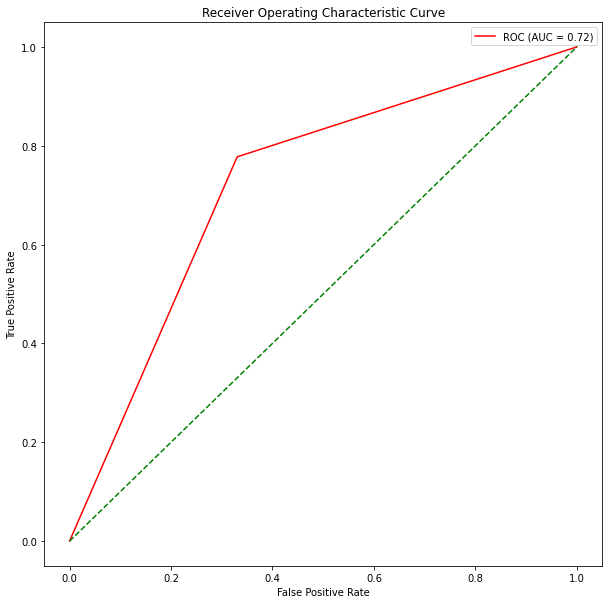

In [49]:
fper, tper, thresholds = roc_curve(df_test_y,predicted)
plot_roc_curve(fper, tper)

In [50]:
C2= confusion_matrix(df_test_y,predicted,labels=[1,0]) 
C2

array([[472, 135],
       [154, 312]], dtype=int64)

In [52]:
df_test = df["2021-10":]
df_test

,Home,HomeScore,Away,AwayScore,讓分,總分,Eventcode_x,主勝(初),客勝(初),主勝率(初),...,Away_starters5_PF,Away_starters5_PTS,Away_starters5_Game_Score,Away_starters5_+/-,Away_starters5_noplay_PointDiff,客隊ELO,主隊ELO,win,Home_startersAll_+/-,Away_startersAll_+/-
Matchtime,,,,,,,,,,,,,,,,,,,,,
2021-10-20,LAL,114,GSW,121,3.5,225.5,429689,1.52,2.52,62.35,...,0.6,2.9,7.2,10.49,3.0,2139.7097,2226.4286,0,15.104,13.440
2021-10-23,BOS,83,TOR,115,6.5,217.5,431010,1.37,3.09,69.20,...,0.8,1.1,6.7,5.50,-3.2,2129.2507,2206.8953,0,13.596,12.362
2021-10-23,CHI,128,NOP,112,6.5,223.5,431011,1.35,3.18,70.02,...,0.3,0.6,4.0,3.73,-5.4,2000.4870,2048.2998,1,14.444,9.148
2021-10-23,DEN,102,SAS,96,7.5,222.5,431013,1.32,3.32,71.44,...,0.9,1.7,10.2,6.56,-8.3,2105.2663,2261.0786,1,12.546,11.622
2021-10-23,SAC,101,UTA,110,-6.5,227.5,431014,2.85,1.41,33.13,...,1.9,2.5,10.6,9.85,-1.1,2321.1965,2081.5910,0,14.614,12.786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-27,CHI,124,IND,109,7.5,232.5,484626,1.30,3.46,72.59,...,1.0,2.2,8.9,7.93,-2.0,1942.8995,2193.6864,1,13.276,14.372
2022-10-27,MIN,134,SAS,122,9.5,235.5,484627,1.25,3.90,75.65,...,1.3,1.5,11.7,9.83,-7.7,2113.3237,2066.1966,1,14.510,11.776
2022-10-27,UTA,109,HOU,101,8.5,232.5,484628,1.44,2.79,65.93,...,1.2,3.9,9.0,6.84,-10.3,1794.1439,2285.1027,1,11.280,10.264


In [53]:
df_s = df_test[['Home','HomeScore','Away','AwayScore','客勝(終)','主勝(終)','win']]
df_s

,Home,HomeScore,Away,AwayScore,客勝(終),主勝(終),win
Matchtime,,,,,,,
2021-10-20,LAL,114,GSW,121,2.30,1.62,0
2021-10-23,BOS,83,TOR,115,3.33,1.33,0
2021-10-23,CHI,128,NOP,112,3.10,1.37,1
2021-10-23,DEN,102,SAS,96,3.49,1.30,1
2021-10-23,SAC,101,UTA,110,1.38,3.03,0
...,...,...,...,...,...,...,...
2022-10-27,CHI,124,IND,109,3.33,1.33,1
2022-10-27,MIN,134,SAS,122,4.38,1.21,1
2022-10-27,UTA,109,HOU,101,3.72,1.28,1


In [54]:
df_s['predict'] = predicted 
df_s

C:\Users\user\AppData\Local\Temp/ipykernel_40024/141304865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s['predict'] = predicted


,Home,HomeScore,Away,AwayScore,客勝(終),主勝(終),win,predict
Matchtime,,,,,,,,
2021-10-20,LAL,114,GSW,121,2.30,1.62,0,1
2021-10-23,BOS,83,TOR,115,3.33,1.33,0,0
2021-10-23,CHI,128,NOP,112,3.10,1.37,1,1
2021-10-23,DEN,102,SAS,96,3.49,1.30,1,1
2021-10-23,SAC,101,UTA,110,1.38,3.03,0,0
...,...,...,...,...,...,...,...,...
2022-10-27,CHI,124,IND,109,3.33,1.33,1,0
2022-10-27,MIN,134,SAS,122,4.38,1.21,1,1
2022-10-27,UTA,109,HOU,101,3.72,1.28,1,1


In [55]:
df_s['predict'] = pre
df_s

C:\Users\user\AppData\Local\Temp/ipykernel_40024/1582062268.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s['predict'] = pre


,Home,HomeScore,Away,AwayScore,客勝(終),主勝(終),win,predict
Matchtime,,,,,,,,
2021-10-20,LAL,114,GSW,121,2.30,1.62,0,0.949521
2021-10-23,BOS,83,TOR,115,3.33,1.33,0,0.146342
2021-10-23,CHI,128,NOP,112,3.10,1.37,1,0.543415
2021-10-23,DEN,102,SAS,96,3.49,1.30,1,0.764804
2021-10-23,SAC,101,UTA,110,1.38,3.03,0,0.021742
...,...,...,...,...,...,...,...,...
2022-10-27,CHI,124,IND,109,3.33,1.33,1,0.238127
2022-10-27,MIN,134,SAS,122,4.38,1.21,1,0.668105
2022-10-27,UTA,109,HOU,101,3.72,1.28,1,0.887495


In [56]:
df_s = df_s[df_s.index < '2022-09-01']
df_s

,Home,HomeScore,Away,AwayScore,客勝(終),主勝(終),win,predict
Matchtime,,,,,,,,
2021-10-20,LAL,114,GSW,121,2.30,1.62,0,0.949521
2021-10-23,BOS,83,TOR,115,3.33,1.33,0,0.146342
2021-10-23,CHI,128,NOP,112,3.10,1.37,1,0.543415
2021-10-23,DEN,102,SAS,96,3.49,1.30,1,0.764804
2021-10-23,SAC,101,UTA,110,1.38,3.03,0,0.021742
...,...,...,...,...,...,...,...,...
2022-06-06,GSW,107,BOS,88,2.64,1.49,1,0.186333
2022-06-09,BOS,116,GSW,100,2.26,1.64,1,0.995534
2022-06-11,BOS,97,GSW,107,2.37,1.59,0,0.996425


In [57]:
money_count = []
win_all = []
money = 0
for i in range(len(df_s)):
    wl = (df_s["predict"][i] >0.5)*1
    if wl == df_s["win"][i]:
        if df_s["predict"][i] > 0.5:
            win = 1000 * (df_s["主勝(終)"][i] - 1)
        elif df_s["predict"][i] < 0.5:
            win = 1000 * (df_s["客勝(終)"][i] - 1)
        else:
            win = 0
    else:
        if df_s["predict"][i] > 0.5 or df_s["predict"][i] < 0.5:
            win = -1000        
        else:
            win = 0
    money += win
    money_count.append(money)
    win_all.append(win)
money

204110.0

In [58]:
df_s["每筆獲利"] = win_all
df_s["累計獲利"] = money_count
df_s

C:\Users\user\AppData\Local\Temp/ipykernel_40024/298355816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s["每筆獲利"] = win_all
C:\Users\user\AppData\Local\Temp/ipykernel_40024/298355816.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s["累計獲利"] = money_count


,Home,HomeScore,Away,AwayScore,客勝(終),主勝(終),win,predict,每筆獲利,累計獲利
Matchtime,,,,,,,,,,
2021-10-20,LAL,114,GSW,121,2.30,1.62,0,0.949521,-1000.0,-1000.0
2021-10-23,BOS,83,TOR,115,3.33,1.33,0,0.146342,2330.0,1330.0
2021-10-23,CHI,128,NOP,112,3.10,1.37,1,0.543415,370.0,1700.0
2021-10-23,DEN,102,SAS,96,3.49,1.30,1,0.764804,300.0,2000.0
2021-10-23,SAC,101,UTA,110,1.38,3.03,0,0.021742,380.0,2380.0
...,...,...,...,...,...,...,...,...,...,...
2022-06-06,GSW,107,BOS,88,2.64,1.49,1,0.186333,-1000.0,206470.0
2022-06-09,BOS,116,GSW,100,2.26,1.64,1,0.995534,640.0,207110.0
2022-06-11,BOS,97,GSW,107,2.37,1.59,0,0.996425,-1000.0,206110.0


In [59]:
s = df_s[df_s['每筆獲利'] != 0]
s

,Home,HomeScore,Away,AwayScore,客勝(終),主勝(終),win,predict,每筆獲利,累計獲利
Matchtime,,,,,,,,,,
2021-10-20,LAL,114,GSW,121,2.30,1.62,0,0.949521,-1000.0,-1000.0
2021-10-23,BOS,83,TOR,115,3.33,1.33,0,0.146342,2330.0,1330.0
2021-10-23,CHI,128,NOP,112,3.10,1.37,1,0.543415,370.0,1700.0
2021-10-23,DEN,102,SAS,96,3.49,1.30,1,0.764804,300.0,2000.0
2021-10-23,SAC,101,UTA,110,1.38,3.03,0,0.021742,380.0,2380.0
...,...,...,...,...,...,...,...,...,...,...
2022-06-06,GSW,107,BOS,88,2.64,1.49,1,0.186333,-1000.0,206470.0
2022-06-09,BOS,116,GSW,100,2.26,1.64,1,0.995534,640.0,207110.0
2022-06-11,BOS,97,GSW,107,2.37,1.59,0,0.996425,-1000.0,206110.0


In [60]:
w = 0
for i in range(len(s)):
    if s['win'][i] == 1 and s['predict'][i] > 0.5:
        w += 1
    elif s['win'][i] == 0 and s['predict'][i] < 0.5:
        w += 1
w / len(s)

0.732421875

In [61]:
import joblib

In [62]:
#joblib.dump( mixmin_scaler.fit(x_train), r"C:\Users\user\NBA預測\20221217\20230112\nba_flaml_73%_scaler20230316.model")

['C:\\Users\\user\\NBA預測\\20221217\\20230112\\nba_flaml_73%_scaler20230316.model']

In [63]:
import pickle

In [65]:
# save model
#with open(r'C:\Users\user\NBA預測\20221217\20230112\nba_flaml_73%20230316.pkl', 'wb') as f:
#    pickle.dump(clf, f)